# Actividad Evaluable 4: Patrones con K-means


## Integrantes: 
**Rosa Vanessa Palacios Beltrán | A01652612**

**Diego Reyna Reyes | A01657387**

**José Roberto Garduño Cerecedo | A01656294**

**Luis Angel Gonzalez Tapia| A01654625**

**Samuel Sandoval Delgado | A01656191**

**Daniel Rong Chen | A01656992**

Para esta actividad se detectarán los patrones con la técnica de clustering **K-means** usando los datos del archivo avocado.csv

1. Cargar tus datos

In [ ]:
#Importar las librerias para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

El archivo avocado contiene 14 categorias:


1. Date
2. AveragePrice
3. Type
4. Year
5. Region
6. Total Volumen
7. 4046
8. 4225
9. 4770
10. Unnamed
11. Total Bags
12. Small Bags
13. Large Bags
14. XLarge Bags






Para esta actividad solo tendrémos en cuenta 3 variables:


*   AveragePrice
*   Unnamed: Número de la semana del año
*   Year

Esto porque es nos ayuda a poder determinar valores de compra y producción deacuerdo al tiempo.

La decisión de usar las tres variables anteriormente mencionadas fueron basandonos en el Hisograma a continuación:


<ipython-input-54-8236a7d8e514>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['region'],1).hist()


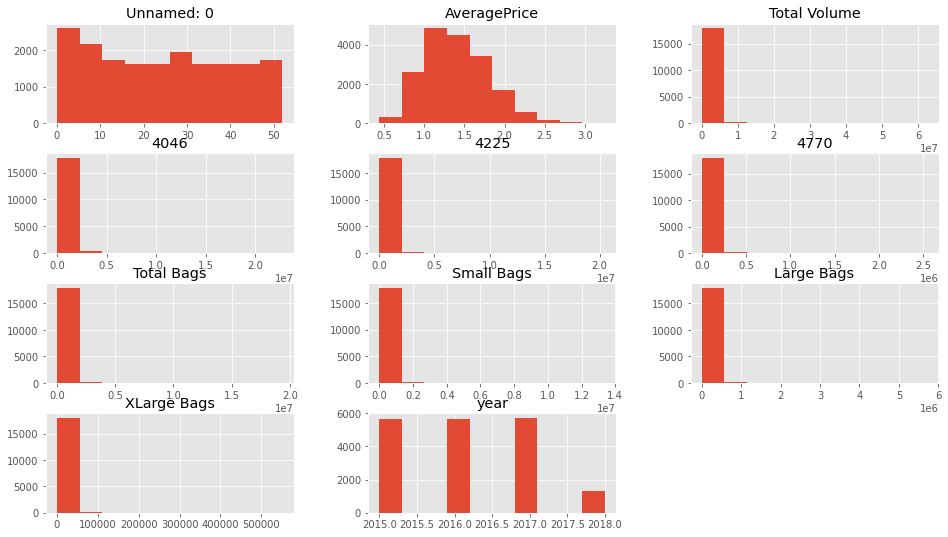

In [ ]:
dataframe.drop(['region'],1).hist()
plt.show()

In [ ]:
print(dataframe["AveragePrice"].shape)

(18249,)


In [ ]:
print(dataframe["Unnamed: 0"].shape)

(18249,)


In [ ]:
print(dataframe["year"].shape)

(18249,)


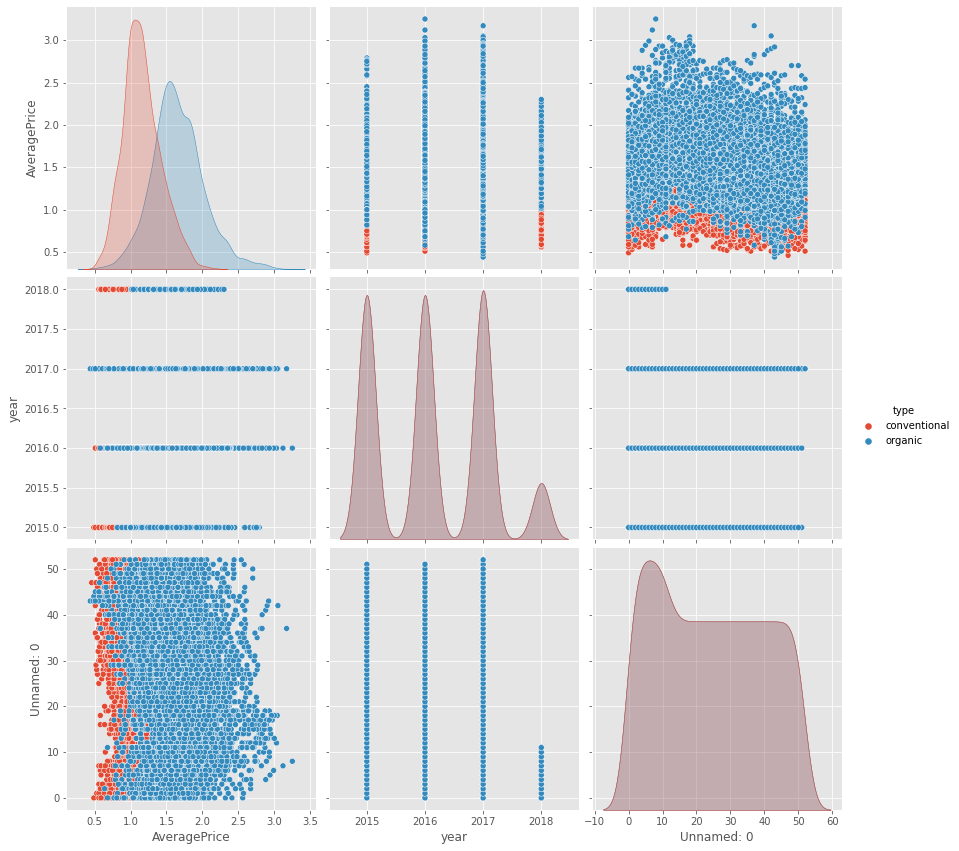

In [ ]:
sb.pairplot(dataframe.dropna(), hue='type',height=4,vars=["AveragePrice","year","Unnamed: 0"],kind='scatter')

In [ ]:
X = np.array(dataframe[["AveragePrice","year","Unnamed: 0"]])
y = np.array(dataframe['type'])
X.shape

(18249, 3)

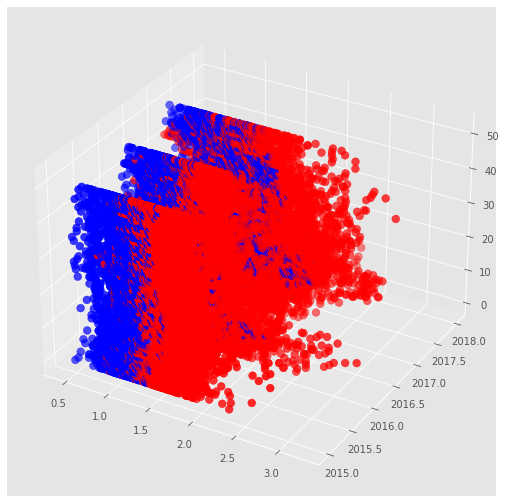

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
colores=['blue','red']
asignar=[]

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

 3. Determina un valor de k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

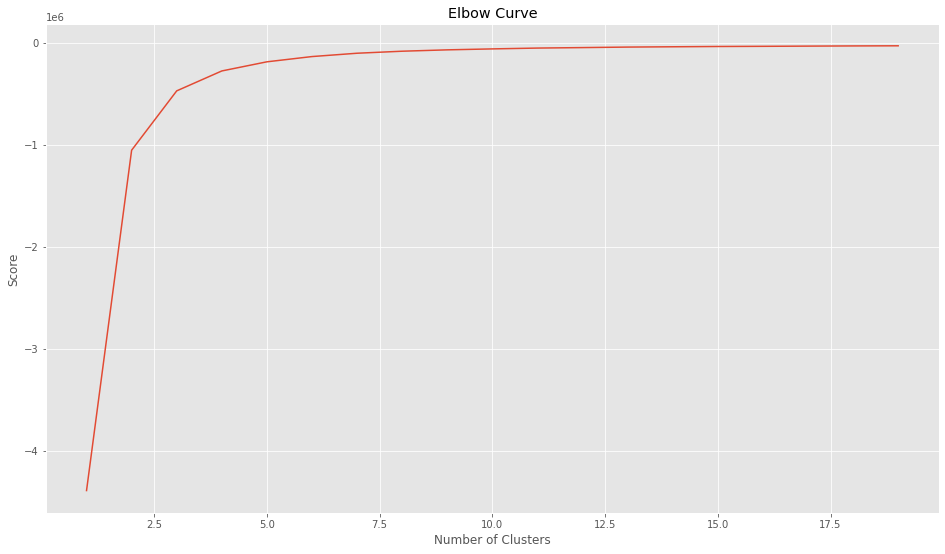

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Con la gráfica anterior decidimos que el valor de K sea 5 porque es nuestro "punto de codo".

4. Utilizando scikitlearn calcula los centros del algoritmo k-means.

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.54316498e+00 2.01618182e+03 1.31818182e+01]
 [1.29031616e+00 2.01602916e+03 4.61722540e+01]
 [1.35977834e+00 2.01600000e+03 3.50000000e+01]
 [1.38744084e+00 2.01650000e+03 4.00000000e+00]
 [1.45428451e+00 2.01600000e+03 2.40000000e+01]]


In [ ]:
dist_c = np.zeros((5,5))
for i,c1 in enumerate(centroids):
  for j,c2 in enumerate(centroids):
    dist_c[i,j] = np.sqrt((c1[0]-c2[0])**2+(c1[1]-c2[1])**2+(c1[2]-c2[2])**2)
print(dist_c)

[[ 0.         32.99175795 21.81971004  9.18864924 10.82007465]
 [32.99175795  0.         11.17250802 42.17499413 22.17287948]
 [21.81971004 11.17250802  0.         31.00404434 11.00040597]
 [ 9.18864924 42.17499413 31.00404434  0.         20.00636069]
 [10.82007465 22.17287948 11.00040597 20.00636069  0.        ]]


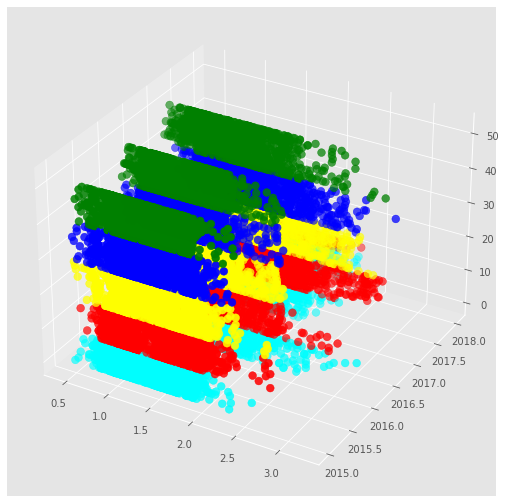

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

## Conclusiones de Diego Reyna Reyes A01657387

### ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Si, ya que nos indican tendencias con respecto al precio en la época del año, al igual que podemos observar que dichas tendencias son válidas ya que se repiten cada año.
### ¿Cómo obtuviste el valor de k a usar?

Al realizar el score en la curva, se pudo observar que el valor de k se debería encontar entre 4 y 5, por lo que se decidió el 5 ya que nos permite tener una mayor cantidad de clusters nos permite elimnar el cesgo de 4 estaciones del año.
### ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

No, ya que la curva se aplana tras ese número de centros, aunque la ditribución de los datos para el 2018, nos genera que los centro se desfacen hacia estos datos
### ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

La distancia entre los centros es aceptable, sin embargo, se considera que, para hacer un mejor análisis de esta distancia, se deberían escalar los datos, ya que los datos de Unnamed: 0 están en el rango \[\0:51\], mientras que los demás se encuentran en rangos más pequeños, por lo que esto genera que distancias grandes en este parámetro predominen sobre los demás parámetros.
### ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Se verían más datos que están separados del grupo, al igual que se vería una curva pequeña alejada del resto en las gráficas de la diagonal del análisis
### ¿Qué puedes decir de los datos basándose en los centros?

El precio de los aguacates están relacionados a la semana del año, con muy poca variación entre los años.

## Conclusión Rosa Vanessa Palacios Beltran | A01652612

- **¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**
Los centros si representan los datos porque nos muestran patrones y tendencias en los precios que se repiten cada año en determinadas épocas, lo que sugiere que son válidos y confiables como una muestra representativa.
- **¿Cómo obtuviste el valor de k a usar?**
El valor de k se decidió después de realizar una evaluación de la curva y se determinó que el valor de k debería estar entre 4 y 5. Se eligió un valor de k igual a 5 porque esto permitiría tener un mayor número de clusters.

- **¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**
No se espera que los centros sean más representativos si se usa un valor más alto que 5 para el número de clusters, ya que la curva de score se aplana después de este valor. Tampoco se espera que los centros sean más representativos si se usa un valor más bajo que 5, ya que la distribución de los datos del 2018 hace que los centros se desplacen hacia estos datos. Por lo tanto, 5 parece ser un valor adecuado para el número de clusters en este caso.
- **¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?**
La distancia entre los centros es aceptable, sin embargo, para hacer un mejor análisis de esta distancia, se recomienda escalar los datos. Esto se debe a que los datos de la columna "Unnamed: 0", mientras que los demás parámetros se encuentran en rangos más pequeños. Esto puede generar que las distancias grandes en esta columna predominen sobre los demás parámetros y afecten la distancia entre los centros. Por lo tanto, se sugiere escalar los datos para tener una mejor evaluación de la distancia entre los centros y verificar si alguno de ellos está muy cercano a otros.
- **¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**
Si tuviéramos muchos outliers en el análisis de cajas y bigotes, los centros podrían verse afectados, ya que se verían más datos separados del grupo. También, en las gráficas de la diagonal del análisis, se observaría una curva pequeña alejada del resto de las curvas. Esto puede afectar el resultado de los clusters y hacer que algunos centros estén más alejados de lo esperado. Por lo tanto, es importante considerar la presencia de outliers y tomar medidas para manejarlos adecuadamente antes de realizar el análisis de clustering.
- **¿Qué puedes decir de los datos basándose en los centros?**
Con los centros obtenidos mediante el análisis de clustering, podemos decir que el precio de los aguacates está relacionado principalmente con la semana del año, y que hay muy poca variación entre los diferentes años. Esto sugiere que el precio de los aguacates tiende a seguir un patrón estacional predecible a lo largo del tiempo, y que este patrón se repite de manera similar en diferentes años. Estos hallazgos pueden ser útiles para entender y predecir el comportamiento del precio de los aguacates en el futuro.





**Samuel Sandoval Delgado A0165691**


    ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

    ¿Cómo obtuviste el valor de k a usar?
    ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

    ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

    ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
    ¿Qué puedes decir de los datos basándose en los centros?


# Conclusiones José Roberto Garduño Cerecedo A01656294
**¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**
Si, ya que representan la tendencia del precio promedio con la época del año las cuales se repiten año tras año. 

**¿Cómo obtuviste el valor de k a usar?**
Para la obtención de K se realizo el trazado de una gráfica en la cual se encontró "punto de codo", punto en el cual se comienza a regular los valores. De esta manera, se determino que el valor de k sería 5. 

**¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**
No, ya que la curva obtenida se comienza a regular a partir de ese valor. 

**¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?**
En este caso, a la hora de que los datos no se encuentran normalizados, ya que para la variable unnamed se tiene un rango de 0 a 51, la distancia de los centros se presenta como alta. 

**¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**
Se podrían apreciar valores los cuales no estan presentes en los grupos.

**¿Qué puedes decir de los datos basándose en los centros?**
El precio de los aguacates varia muy poco durante los años tomando en cuenta cada semana del mismo. 

## Conclusión Daniel Rong Chen A01656992


¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Sí, porque fueron obtenidos a partir de estos e indican los precios de aguacates más predominantes o representativos a lo largo de un año, sin embargo, los centros serían más representativos si el valor de K fuera más exacto, pues este fue obtenido a partir de nuestra interpretación del valor de K.

¿Cómo obtuviste el valor de k a usar?
Para el obtener el valor de K se tuvo que graficar el score de los datos seleccionados y después determinar según nuestro criterio el número de clusters. El valor de K se debe obtener empleando el método de codo, por lo que este puede ser inexacto. En este caso se estableció un número de clusters de 5. 

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo
Los centros serían más representativos si se usara un valor más bajo, ya que K sería un valor más exacto a un valor obtenido por el método del codo. Sin embargo, usar un valor menor de centros puede que haya mayor dispersión en los datos, al tener datos que posiblemente que estén entre varios centros.

¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?
La distancia entre los centros es moderada y parece ser que las distancias entre los centros son parecidas. Esto puede dar a entender los centros son precisos, sin embargo, faltaría observar las distancias cuando hay más o menos centros.

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Los centros serían menos precisos y exactos y habrían más datos flotando entre centros y no tan cercanos a estos. Esto se debe a que estos datos que están muy dispersos aumentan el rango y afectarían la gráfica del score, por lo que a su vez modificaría el valor de los centros.

¿Qué puedes decir de los datos basándose en los centros?
Con base en los centros, se puede observar la variación de los precios de aguacates en un año conforme avanzan las semanas. Esta variación es poca, ya que los datos no se encuentran tan dispersos de los centros. 